# Weekly Assignment 3 (part 1): matplotlib

Please use this notebook to show your work in recreating the first visualizations from the second part of the first lab (the Tableau lab). Specifically, please try to reproduce the first figure (The Bechdel Test Over Time) from this article as closely as you can: https://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/

To submit, please run all cells in this notebook, print it as a pdf, and upload both the .pdf file and the .ipynb file (this notebook) to Canvas.

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [2]:
# Load the data from movies_independent_part_2.csv using pandas

df = pd.read_csv('movies_independent_part_2.csv', index_col=0)
df.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,...,domgross_2013$,intgross_2013$,period code,decade code,director,director_gender,genre,rating,country,language
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,...,25682380.0,42195766.0,1.0,1.0,Jon Lucas,male,Comedy,5.9,United States,English
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,...,13611086.0,41467257.0,1.0,1.0,Pete Travis,male,Action,7.1,United Kingdom,English
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,...,53107035.0,158607035.0,1.0,1.0,Steve McQueen,male,Biography,8.1,United States,English
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,...,75612460.0,132493015.0,1.0,1.0,Baltasar Kormákur,male,Action,6.7,United States,English
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,...,95020213.0,95020213.0,1.0,1.0,Brian Helgeland,male,Biography,7.5,United States,English


In [4]:
# Create the first visualization (The Bechdel Test Over Time)
# You are free to use any workflow you like, but some suggested steps are given below:

In [11]:
# Suggested steps:

# 1. Inspect the data to see if you need to worry about NaNs, etc.

test_results = df['clean_test'].values
test_results = set([v for v in test_results])
print(test_results)

{'notalk', 'men', 'nowomen', 'ok', 'dubious'}


In [15]:
# 2. For each year, count the number of films with each test result

df[['year', 'clean_test']].groupby(['year', 'clean_test']).size().unstack(fill_value=0)

clean_test,dubious,men,notalk,nowomen,ok
year,,,,,
1970,0,0,0,0,1
1971,0,1,4,0,0
1972,0,0,2,0,1
1973,0,1,3,0,1
1974,0,1,4,0,2
1975,1,2,2,0,0
1976,0,1,4,0,3
1977,0,0,4,1,2
1978,1,1,2,2,2


In [27]:
# 3. Combine the counts into the 5-year buckets used in the visualization
years = df['year']
years = set(years)

bins = np.arange(min(years), max(years) + 5, 5)

df['year_bins'] = pd.cut(x=df['year'], bins=bins, right=False)

df_counts = df[['year_bins', 'clean_test']].groupby(['year_bins', 'clean_test']).size().unstack(fill_value=0)
df_counts

clean_test,dubious,men,notalk,nowomen,ok
year_bins,,,,,
"[1970, 1975)",0,3,13,0,5
"[1975, 1980)",2,4,14,4,9
"[1980, 1985)",9,10,16,10,13
"[1985, 1990)",7,9,21,7,23
"[1990, 1995)",5,13,26,13,33
"[1995, 2000)",19,24,79,11,114
"[2000, 2005)",19,36,90,29,178
"[2005, 2010)",38,50,134,35,231
"[2010, 2015)",43,45,121,32,197


In [28]:
# 4. Convert the counts per bucket into percentages

df_counts = df_counts.transpose()

df_counts = df_counts/df_counts.sum()*100

df_percentages = df_counts.transpose()
df_percentages

clean_test,dubious,men,notalk,nowomen,ok
year_bins,,,,,
"[1970, 1975)",0.000000,14.285714,61.904762,0.000000,23.809524
"[1975, 1980)",6.060606,12.121212,42.424242,12.121212,27.272727
"[1980, 1985)",15.517241,17.241379,27.586207,17.241379,22.413793
"[1985, 1990)",10.447761,13.432836,31.343284,10.447761,34.328358
"[1990, 1995)",5.555556,14.444444,28.888889,14.444444,36.666667
"[1995, 2000)",7.692308,9.716599,31.983806,4.453441,46.153846
"[2000, 2005)",5.397727,10.227273,25.568182,8.238636,50.568182
"[2005, 2010)",7.786885,10.245902,27.459016,7.172131,47.336066
"[2010, 2015)",9.817352,10.273973,27.625571,7.305936,44.977169


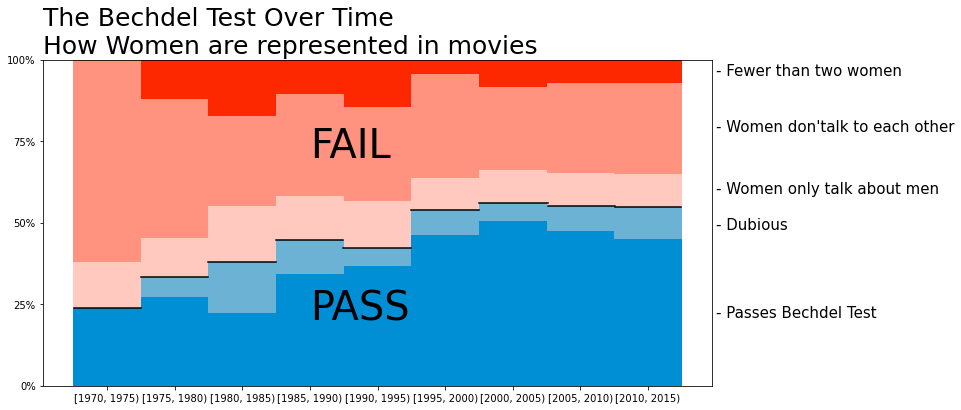

In [194]:
# 5. Create a new plot using plt.subplots()
# For each category, add a set of bars using ax.bar()
# Note that you can accomplish the stacking by telling it where to start using the "bottom" parameter

from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0] * len(df_percentages.index.astype(str))
columns = ['ok', 'dubious', 'men', 'notalk', 'nowomen']
colors = [ (0, 143, 212), (107, 178, 212), (255, 201, 191), (255, 147, 128), (254, 40, 0) ]
colors = [[v/255 for v in color] for color in colors]

for i, column in enumerate(columns):
    if i == 0:
        ax.bar(df_percentages.index.astype(str), df_percentages[column].values, label=column, color=colors[i], width=1)
    else:
        bottom += df_percentages[columns[i-1]].values
        ax.bar(df_percentages.index.astype(str), df_percentages[column].values, label=column, bottom=bottom, color=colors[i], width=1)

ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(FormatStrFormatter('%d%%'))

ax.set_title('The Bechdel Test Over Time\nHow Women are represented in movies', fontsize=25, loc='left')

ax.text(df_percentages.index.astype(str)[3], 70, 'FAIL', size=40)
ax.text(df_percentages.index.astype(str)[3], 20, 'PASS', size=40)
ax.text('', 21, '- Passes Bechdel Test', size=15)
ax.text('', 48, '- Dubious', size=15)
ax.text('', 59, '- Women only talk about men', size=15)
ax.text('', 78, '- Women don\'talk to each other', size=15)
ax.text('', 95, '- Fewer than two women', size=15)

heights = df_percentages['ok'].values + df_percentages['dubious'].values
widths = [0.046, 0.147, 0.247, 0.349, 0.449, 0.55, 0.652, 0.755, 0.855, 0.954]

for i in range(9):
    plt.axhline(y=heights[i], xmin=widths[i], xmax=widths[i+1], color = 'black')

plt.show()

In [ ]:
# 6. Add any finishing touches